In [42]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 랜덤하게 각 주식의 가격 100개 데이터 생성
# 삼성
dates = pd.date_range(start='2021-01', periods=100, freq='D')
samsung_prices = [random.randint(800000, 900000) for _ in range(100)]
samsung_data = {'Date':dates, '005930.KS':samsung_prices}
samsung_df = pd.DataFrame(samsung_data)
samsung_df.set_index('Date', inplace=True)

# LG
lg_prices = [random.randint(1400000, 1600000) for _ in range(100)]
lg_data = {'Date':dates, '066570.KS':lg_prices}
lg_df = pd.DataFrame(lg_data)
lg_df.set_index('Date', inplace=True)

# 두 데이터프레임을 합쳐서 하나의 데이터프레임으로 만들기
df = pd.concat([samsung_df, lg_df], axis=1)
df = df.loc[:,['005930.KS', '066570.KS']]
df.columns = ['samsung','LG']

# 폴더 생성
os.makedirs("./data/", exist_ok=True)

# 저장
df.to_csv("./data/stock_price.csv")

In [43]:
# csv 읽기
df = pd.read_csv('./data/stock_price.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
print(df)

            samsung       LG
Date                        
2021-01-01   809656  1504001
2021-01-02   862529  1549554
2021-01-03   867353  1579105
2021-01-04   847484  1438012
2021-01-05   808080  1555704
...             ...      ...
2021-04-06   899975  1438015
2021-04-07   811736  1575885
2021-04-08   880146  1496348
2021-04-09   847642  1434698
2021-04-10   817887  1595657

[100 rows x 2 columns]


In [44]:
# 두 종목의 수익률 계산
returns = df.pct_change()
print(returns)

# 수익률 간의 상관 계수 계산
corr_matrix = returns.corr()
print(corr_matrix)

             samsung        LG
Date                          
2021-01-01       NaN       NaN
2021-01-02  0.065303  0.030288
2021-01-03  0.005593  0.019071
2021-01-04 -0.022908 -0.089350
2021-01-05 -0.046495  0.081844
...              ...       ...
2021-04-06  0.111913 -0.091431
2021-04-07 -0.098046  0.095875
2021-04-08  0.084276 -0.050471
2021-04-09 -0.036930 -0.041200
2021-04-10 -0.035103  0.112190

[100 rows x 2 columns]
          samsung        LG
samsung  1.000000 -0.074126
LG      -0.074126  1.000000


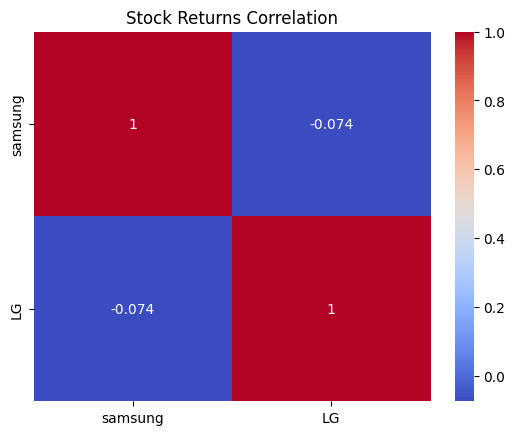

In [45]:
# 히트맵 그리기
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Stock Returns Correlation')
plt.show()